In [2]:
import pandas as pd 

In [5]:
df = pd.read_csv("wine.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [9]:
df.duplicated().sum()

240

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [16]:
df["quality"] = df['quality'].map({'bad':0,'good':1})

In [17]:
X = df.drop(columns=['quality'])
y = df['quality']

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [19]:
y

0       0
1       0
2       0
3       1
5       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: quality, Length: 1359, dtype: int64

In [30]:
X_train_scaled.shape

(951, 11)

In [31]:
y_train.shape

(951,)

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train ,X_test,  y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
sacler = MinMaxScaler()

In [55]:
X_train_scaled = sacler.fit_transform(X_train)
X_test_scaled = sacler.transform(X_test)

In [56]:
import tensorflow 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense 

In [57]:
model = Sequential()
model.add(Dense(32,input_dim=11,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\prati\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.layers

[<Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss=['binary_crossentropy'],optimizer = 'adam',metrics=['acc'])

In [61]:
log_folder = 'logs'
%load_ext tensorboard
!rmdir -rf logs
tb_cb = tensorflow.keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1)



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


The system cannot find the file specified.
The directory is not empty.


In [62]:
early_cb = tensorflow.keras.callbacks.EarlyStopping(patience=5)

In [63]:
history = model.fit(X_train_scaled,y_train,epochs=20,validation_split=0.3, batch_size=32,callbacks=[tb_cb,early_cb])

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - acc: 0.4500 - loss: 0.7172 - val_acc: 0.5734 - val_loss: 0.6864
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.6091 - loss: 0.6807 - val_acc: 0.6399 - val_loss: 0.6670
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7007 - loss: 0.6543 - val_acc: 0.6434 - val_loss: 0.6527
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6998 - loss: 0.6416 - val_acc: 0.6993 - val_loss: 0.6335
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7540 - loss: 0.6231 - val_acc: 0.7517 - val_loss: 0.6118
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7648 - loss: 0.5950 - val_acc: 0.7203 - val_loss: 0.5937
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7369 - loss: 0.5847 - val_acc: 0.7308 - val_loss: 0.5691
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7560 - loss: 0.5608 - val_acc: 0.7483 - val_loss: 0.5535
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7748

In [64]:
%tensorboard --logdir={log_folder}

Reusing TensorBoard on port 6006 (pid 2508), started 0:03:35 ago. (Use '!kill 2508' to kill it.)

In [66]:
pd.DataFrame(history.history)

,acc,loss,val_acc,val_loss
0,0.454135,0.706725,0.573427,0.686371
1,0.633083,0.674651,0.639860,0.666993
2,0.646617,0.655525,0.643357,0.652685
3,0.715789,0.636403,0.699301,0.633469
4,0.747368,0.615120,0.751748,0.611751
5,0.750376,0.595224,0.720280,0.593659
6,0.757895,0.570527,0.730769,0.569086
7,0.766917,0.552650,0.748252,0.553541
8,0.759399,0.535507,0.748252,0.541102
9,0.771429,0.522179,0.730769,0.529835


<AxesSubplot:>

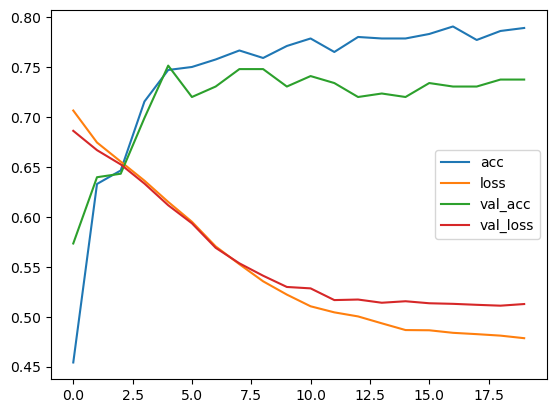

In [67]:
pd.DataFrame(history.history).plot()

In [71]:
y_pred = model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
